<a href="https://colab.research.google.com/github/munevvercoskun/Digital-Systems/blob/main/Munevver_Coskun_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

x-mean: 48.959 
y-mean: 72.73500000000001
x-sd: 9.697639867514157 
y-sd: 16.574748112716527


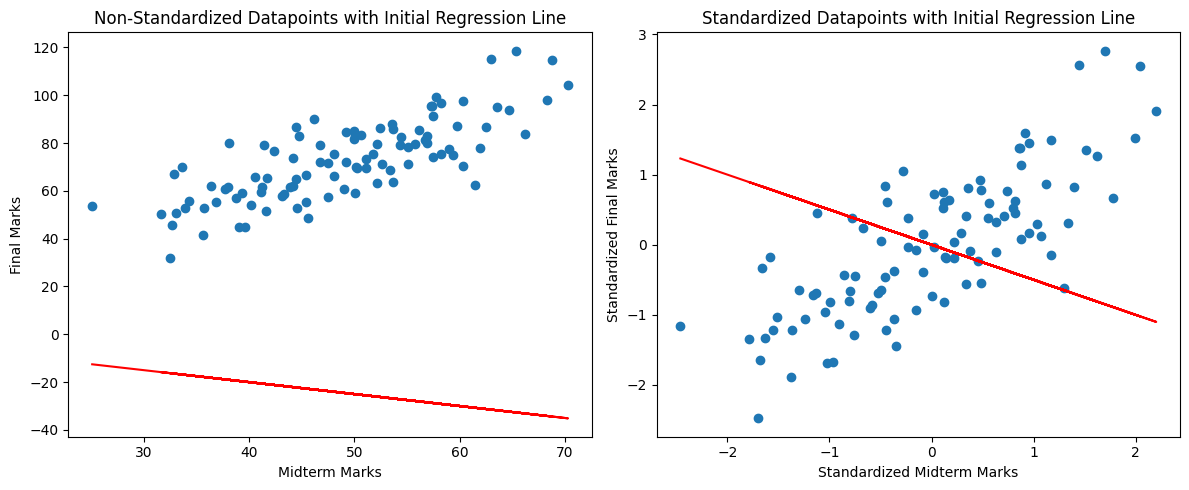

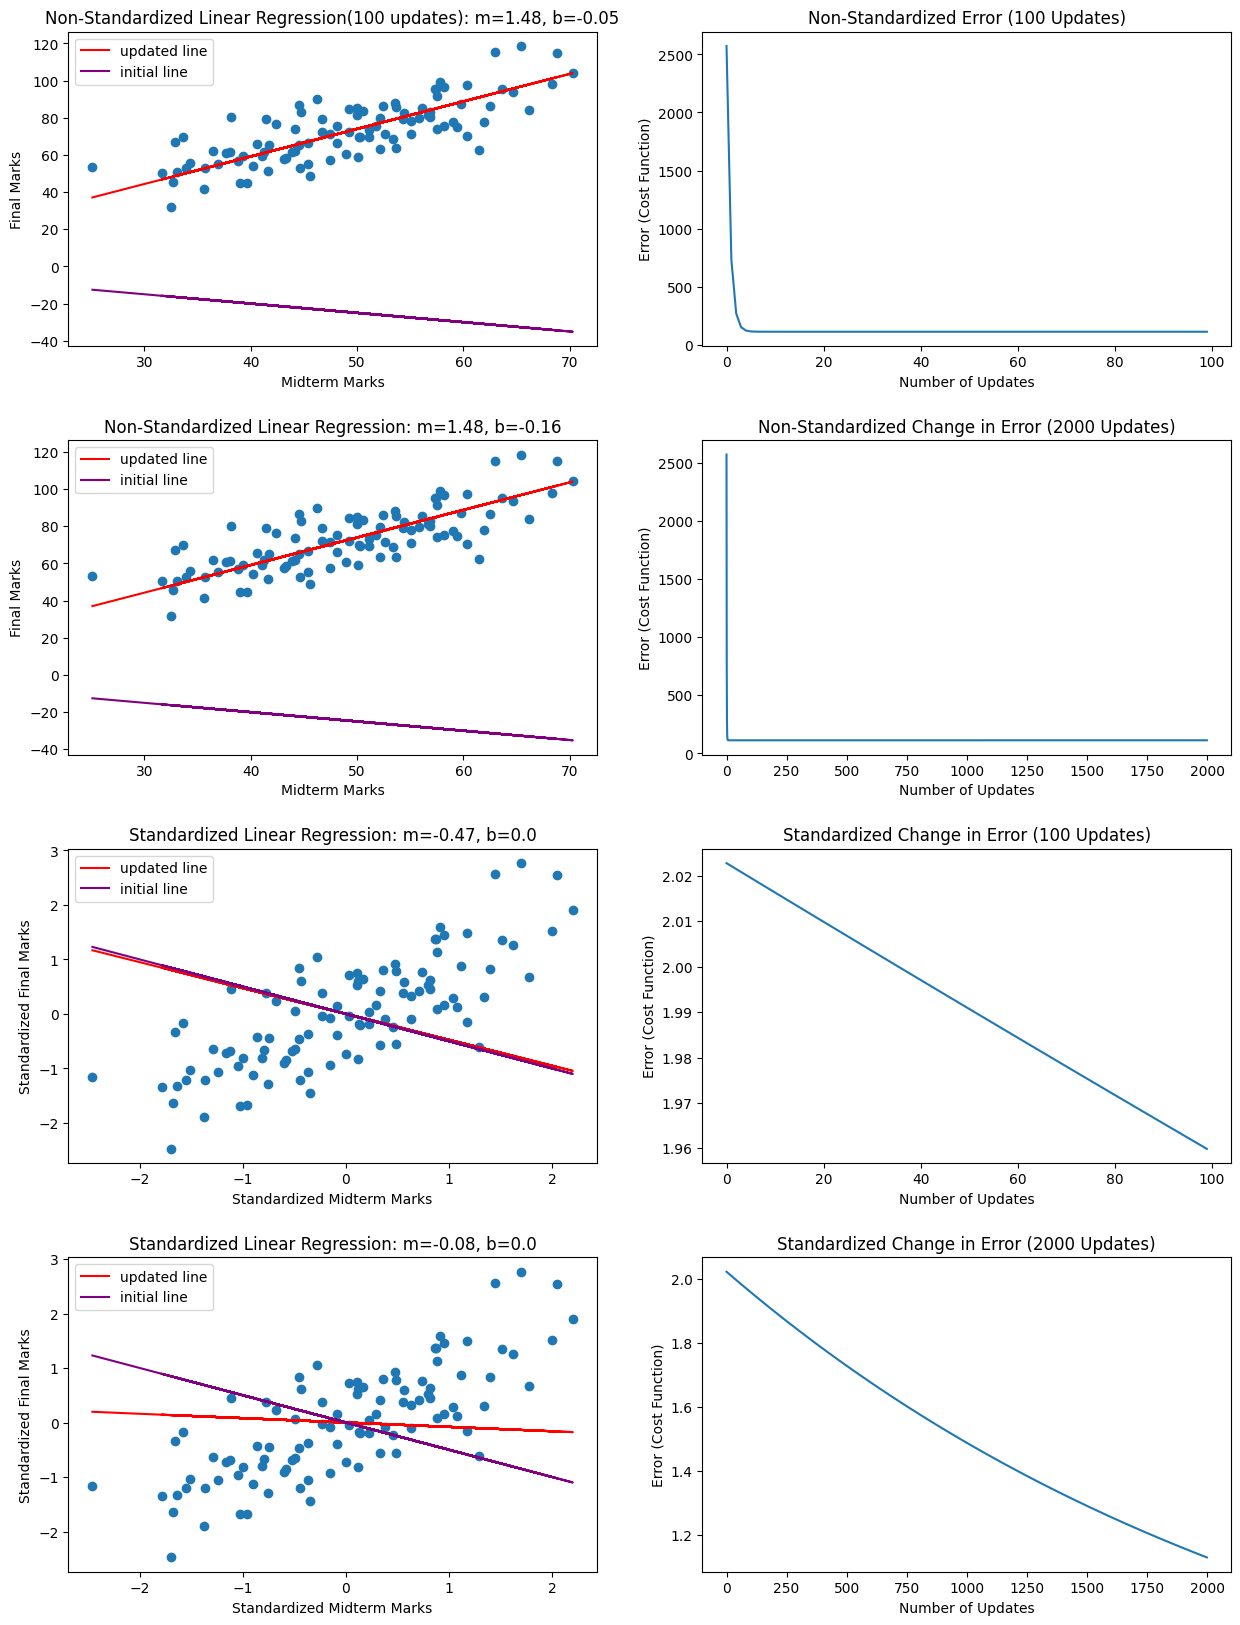

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt, floor
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/student_marks.csv')

stand = StandardScaler().fit_transform(df)

# Separation of non-standardized x and y
x = df['Midterm mark']
y = df['Final mark']

##############  Data Preparation- Extraction of Mean and Standard Deviation  ##############

# Calculation of Mean
x_mean = sum(x)/len(x)
y_mean = sum(y)/len(y)
print(f'x-mean: {x_mean} ')
print(f'y-mean: {y_mean}')

# Calculation of Standard Deviation
x_standard_deviation = sqrt(sum((x - x_mean) ** 2) / len(x))
y_standard_deviation = sqrt(sum((y - y_mean) ** 2) / len(y))
print(f'x-sd: {x_standard_deviation} ')
print(f'y-sd: {y_standard_deviation}')

#Standardization
x_stand = []
y_stand = []
x_stand = (x-x_mean) / x_standard_deviation
y_stand = (y-y_mean) / y_standard_deviation

x_stand_sk = []
y_stand_sk = []

for i in range(len(stand)):
    x_stand_sk.append(stand[i][0])
    y_stand_sk.append(stand[i][1])

############  Error (Cost) Function  ##############

def calculate_error(m, b, x, y):
    return sum((y - (m*x+b)) ** 2)/len(x)

def calculate_error_sk(m, b, x, y):
    s1 = []
    for i in range(len(y_stand_sk)):
        s1.append((y[i] - (m*x[i]+b)) ** 2)
    return sum(s1)/len(x)

##########  Updating Function for m and b with learning rate a

def update(updates, a, x, y):
    m, b, a = -0.5, 0, a
    E = []
    for i in range(updates):
        partial_m = 2/len(y) * sum(-x * (y - (m*x + b)))
        partial_b = 2/len(y) * sum(y - (m*x + b))
        m = m - (a * partial_m)
        b = b - (a * partial_b)
        E.append(calculate_error(m, b, x, y))
    return m, b, E

def calculate_sum(m, b):
    partial_m_sk, partial_b_sk = [], []
    for i in range(len(y_stand_sk)):
        partial_m_sk.append(-x_stand_sk[i] * (y_stand_sk[i] - (m * x_stand_sk[i] + b)))
        partial_b_sk.append((y_stand_sk[i] - (m * x_stand_sk[i] + b)))
    partial_m = 2/len(y_stand_sk) * sum(partial_m_sk)
    partial_b = 2/len(y_stand_sk) * sum(partial_b_sk)
    return [partial_m, partial_b]

def update_sk(updates, a):
    m, b, a = -0.5, 0, a
    E = []
    for i in range(updates):
        partials = calculate_sum(m, b)
        m = m - (a * partials[0])
        b = b - (a * partials[1])
        E.append(calculate_error_sk(m, b, x_stand_sk, y_stand_sk))
    return m, b, E
###########  Linear Regression  ###############

# Non-Standardized
m, b, E = update(100, 0.0001, x, y)
initial_line = -0.5 * x + 0
line = m * x + b

# Standardized
m_stand, b_stand, E_stand = update(100, 0.0001, x_stand, y_stand)
initial_line_stand = -0.5 * x_stand + 0
line_stand = m_stand * x_stand + b_stand

plt.figure(figsize=(12, 5))

# Subplot 1: Non-Standardized Datapoints with Initial Regression Line
plt.subplot(1, 2, 1)
plt.scatter(x, y)
plt.plot(x, initial_line, color='red')
plt.title('Non-Standardized Datapoints with Initial Regression Line')
plt.xlabel('Midterm Marks')
plt.ylabel('Final Marks')

# Your existing code for standardized linear regression
# Subplot 2: Standardized Datapoints with Initial Regression Line
plt.subplot(1, 2, 2)
plt.scatter(x_stand, y_stand)
plt.plot(x_stand, initial_line_stand, color='red')
plt.title('Standardized Datapoints with Initial Regression Line')
plt.xlabel('Standardized Midterm Marks')
plt.ylabel('Standardized Final Marks')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the combined plot
plt.show()


%matplotlib inline
fig, pos = plt.subplots(4, 2, figsize=(15, 20))
plt.subplots_adjust(hspace=0.3)

#Non-Standardized with 100 updates
pos[0, 0].scatter(x, y)
pos[0, 0].set_title(f'Non-Standardized Linear Regression(100 updates): m={round(m, 2)}, b={round(b, 2)}')
pos[0, 0].set(xlabel='Midterm Marks', ylabel='Final Marks')
pos[0, 0].plot(x, line, color='red', label='updated line')
pos[0, 0].plot(x, initial_line, color='purple', label='initial line')
pos[0, 0].legend()

#Non-Standardized Error Updates with 100 updates
pos[0, 1].set_title(f'Non-Standardized Error (100 Updates)')
pos[0, 1].set(xlabel='Number of Updates', ylabel='Error (Cost Function)')
pos[0, 1].plot(range(100), E)

#Standardized with 100 updates
pos[2, 0].scatter(x_stand, y_stand)
pos[2, 0].set_title(f'Standardized Linear Regression: m={round(m_stand, 2)}, b={round(b_stand, 2)}')
pos[2, 0].set(xlabel='Standardized Midterm Marks', ylabel='Standardized Final Marks')
pos[2, 0].plot(x_stand, line_stand, color='red', label='updated line')
pos[2, 0].plot(x_stand, initial_line_stand, color='purple', label='initial line')
pos[2, 0].legend()

#Standardized Error Updates with 100 updates
pos[2, 1].set_title(f'Standardized Change in Error (100 Updates)')
pos[2, 1].set(xlabel='Number of Updates', ylabel='Error (Cost Function)')
pos[2, 1].plot(range(100), E_stand)


# Non Standardized Linear Regression
m, b, E = update(2000, 0.0001, x, y)
initial_line = -0.5 * x + 0
line = m * x + b

# Standardized Linear Regression
m_stand, b_stand, E_stand = update(2000, 0.0001, x_stand, y_stand)
initial_line_stand = -0.5 * x_stand + 0
line_stand = m_stand * x_stand + b_stand

#Non-Standardized Linear Regression with 2000 updates
pos[1, 0].scatter(x, y)
pos[1, 0].set_title(f'Non-Standardized Linear Regression: m={round(m, 2)}, b={round(b, 2)}')
pos[1, 0].set(xlabel='Midterm Marks', ylabel='Final Marks')
pos[1, 0].plot(x, line, color='red', label='updated line')
pos[1, 0].plot(x, initial_line, color='purple', label='initial line')
pos[1, 0].legend()

#Non-Standardized Error Updates with 2000 updates
pos[1, 1].set_title(f'Non-Standardized Change in Error (2000 Updates)')
pos[1, 1].set(xlabel='Number of Updates', ylabel='Error (Cost Function)')
pos[1, 1].plot(range(2000), E)

#Standardized with 2000 updates
pos[3, 0].scatter(x_stand, y_stand)
pos[3, 0].set_title(f'Standardized Linear Regression: m={round(m_stand, 2)}, b={round(b_stand, 2)}')
pos[3, 0].set(xlabel='Standardized Midterm Marks', ylabel='Standardized Final Marks')
pos[3, 0].plot(x_stand, line_stand, color='red', label='updated line')
pos[3, 0].plot(x_stand, initial_line_stand, color='purple', label='initial line')
pos[3, 0].legend()

#Standardized Error Updates with 2000 updates
pos[3, 1].set_title(f'Standardized Change in Error (2000 Updates)')
pos[3, 1].set(xlabel='Number of Updates', ylabel='Error (Cost Function)')
pos[3, 1].plot(range(2000), E_stand)

Answers to the Questions in the description box:

Q1: Write your observation by changing the learning rate to 0.1. Include error plots while explaining your observation.

- A higher learning rate can cause the algorithm to converge more quickly.
- It might also lead to overshooting the optimal values, resulting in instability.

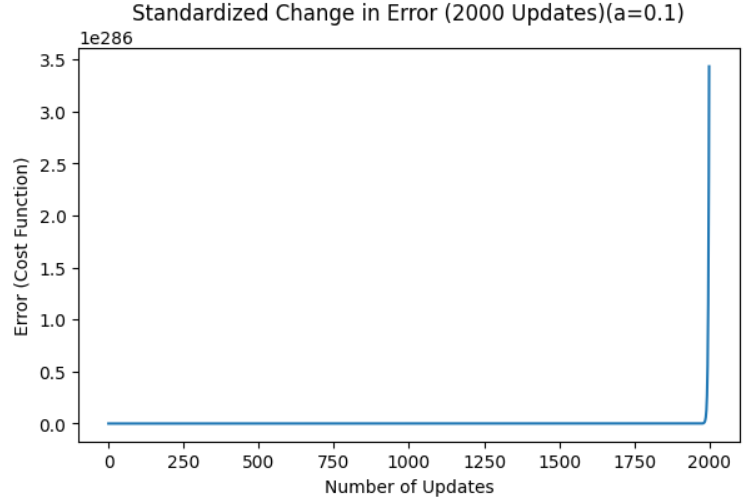

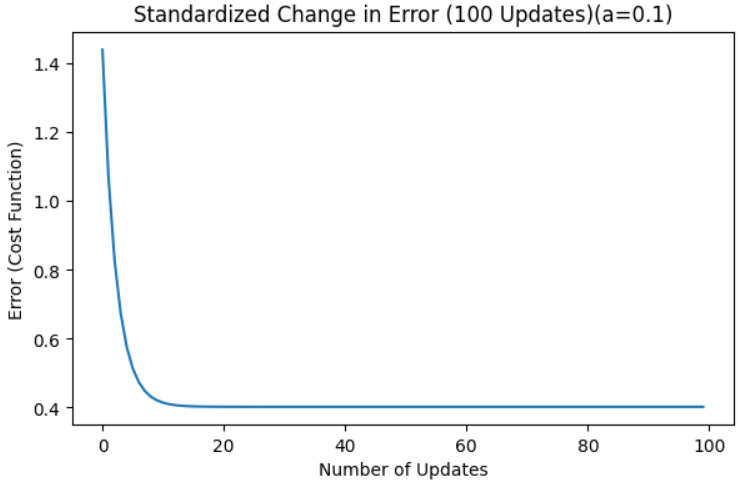

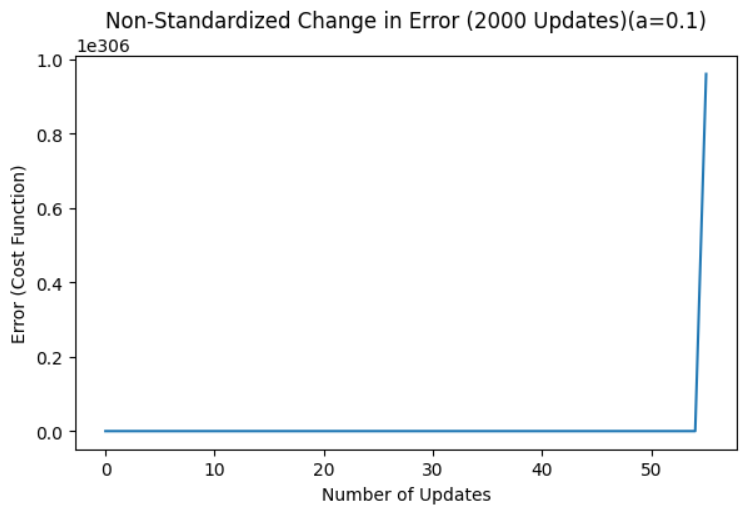

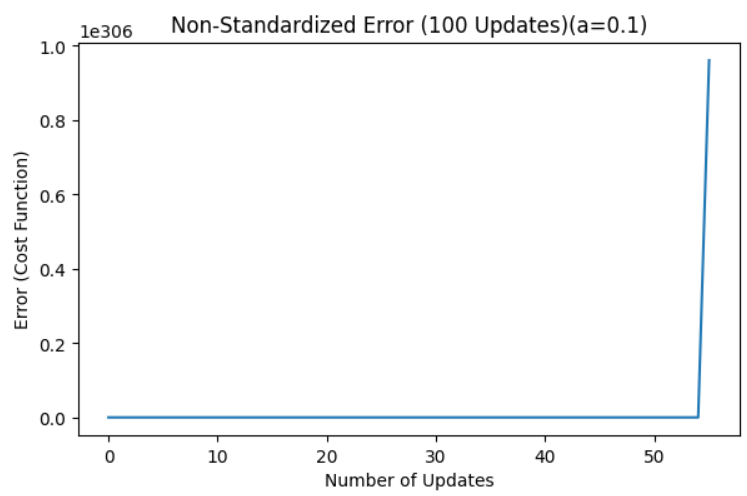

Q2: Investigate the effect of standardization.

- it helps converge faster and avoid numerical instability. Therefore, it is beneficial for Gradient Descent algorithm.
- Directly, it reduces cost beause it is faster.